# Navigation

---
Follow the instructions below to get started!

## 1. The Environment

If you haven't done it yet, run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip3 -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [8]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import torch
import matplotlib.pyplot as plt


# please do not modify the line below
env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [9]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2. The State and Action Spaces

Run the code cell below to print some information about the environment.

In [10]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


## 3. The RL Agent

The agent can be found in the file `dqn_agent.py`, which implements a standard [DQN](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf) agent that uses an Adam optimizer. the choice of hyperparameters can be fond at the beginning of the file.

- buffer size = 1e5
- batch size = 64
- gamma = 0.99
- tau = 1e-3
- learning rate = 5e-4
- update every 4 frames

## 4. The Q Function

The Q function is modeled as a multilayer perceptron composed by fully connected layers and 3 hidden layers with $32\times128\times512$ rectifier units. The model is implemented in the file `model.py`

## 5 The Learning Algorithm

In [11]:
from dqn_agent import Agent
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    env_info = env.reset(train_mode=True)[brain_name]
    agent = Agent(state_size=len(env_info.vector_observations[0]), action_size=brain.vector_action_space_size, seed=0)
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)                 # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'model.pt')
            break
    return scores

In [12]:
scores = dqn()

Episode 100	Average Score: 0.74
Episode 200	Average Score: 4.43
Episode 300	Average Score: 6.36
Episode 400	Average Score: 9.56
Episode 500	Average Score: 12.36
Episode 552	Average Score: 13.00
Environment solved in 452 episodes!	Average Score: 13.00


In [13]:
env.close()

## 6 Plot of Rewards

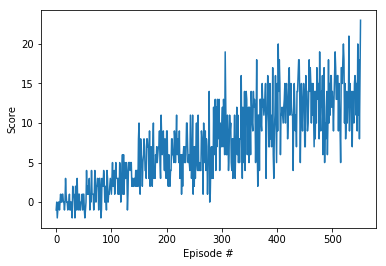

In [14]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('scores.png')
plt.show()

## 7. Future Work

This environment has been solved using a standard DQN implementation. Some potential approachs to improve the performance are:
- Double DQN
- Dueling DQN
- Prioritized experience replay

These methods could also be combined for better results. \
Moreover a Rainbow DQN could also be expected to outperform all the above mentioned options.